In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [15]:
#load data into x and y
dataframe = pd.read_csv("car_price_prediction.csv")
dataframe.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [16]:
#no need to clean data
dataframe.info()
dataframe.isnull().sum()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [17]:

dataframe["Mileage"] = dataframe['Mileage'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)
dataframe["Engine volume"] = dataframe["Engine volume"].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

features = ["Prod. year", "Engine volume", "Cylinders", "Mileage"]

y = dataframe["Price"].to_numpy()
x = dataframe["Prod. year"].to_numpy()


#print(x)
#print(dataframe.dtypes)
#corr_matrix = dataframe.corr()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)




x_scaled = StandardScaler()
y_scaled = StandardScaler()

x_init = x_scaled.fit_transform(x_train.reshape(-1,1)) #expects 2D, we havev 1d - reshape to fit 1d
y_init = y_scaled.fit_transform(y_train.reshape(-1,1)) #expects 2D, we havev 1d - reshape to fit 1d

print(x_train[:5])
print(type(x_train))
print(x_train.shape)

print(y_train[:5])
print(type(y_train))
print(y_train.shape)
#m (# of training ex) = 15389

[2013 2007 2010 2012 2000]
<class 'numpy.ndarray'>
(15389,)
[  314  6429 12388 14834 10036]
<class 'numpy.ndarray'>
(15389,)


(0.0, 200000.0)

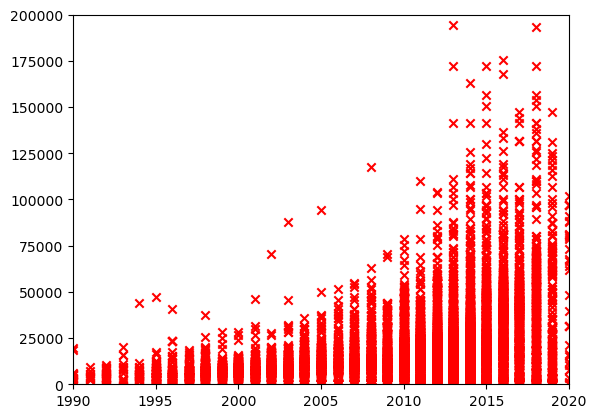

In [19]:
#plt.scatter(x_train[:,0], y_train, marker='x', c='y') 
plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlim(1990, 2020)
plt.ylim(0, 200000)

In [20]:
#f(x) = wx + b
#w and b are set as random values at the beginning
#Cost Function 
def compute_cost(x, y, w, b):


    m = x.shape[0] 

    total_cost = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        cost_i = (f_wb_i - y[i])**2 #square error avoid -err and penalize larger err
        total_cost += cost_i 
    total_cost = (1/(2*m)) * total_cost

    return total_cost
        


In [21]:
ans = compute_cost(x_train, y_train, 1, 2)
print(ans)

22804508716.835434


In [22]:
def compute_grad_descent_step(b, w, x, y):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        fwb_i = w * x[i] + b 
        dj_db_i = fwb_i - y[i] 
        dj_dw_i = ( fwb_i - y[i] ) * x[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_db = (1/m) * dj_db
    dj_dw = (1/m) * dj_dw

    return dj_db, dj_dw

In [23]:
def gradient_descent(x, y, w_in, b_in, cost_funct, grad_funct, a, iters):
    m = len(x)
    


    w = copy.deepcopy(w_in) #dont want to modify the original weights 
    b = b_in
    J_hist = []
    w_hist = []
    
    for i in range(iters):

        dj_db, dj_dw = grad_funct(b, w , x, y)

        b = b - a * dj_db
        w = w - a * dj_dw

        if i < 100000:
            cost = cost_funct(x, y, w, b)
            J_hist.append(cost)

        if i % math.ceil(iters/10) == 0:
            w_hist.append(w)
            #print(f"iterations {i:4}: Cost {float(J_hist[-1]):8.2f}   ")

    return w, b, J_hist, w_hist
    

In [24]:
init_w = 0.
init_b = 0.
alpha = .01
iterations =  500


w, b, _, _ = gradient_descent(x_init, y_init,init_w, init_b, compute_cost, compute_grad_descent_step, alpha, iterations   )

print("Final w and b :", w,b)

Final w and b : [0.00888618] [-1.17963929e-16]


In [25]:

m = x_train.shape[0]
predicted = np.zeros(m)

print(x_init.shape)
for i in range(m):
    predicted[i] = w * x_init[i].item() + b  # Use .item() to get scalar value
    

(15389, 1)


C:\Users\leads\AppData\Local\Temp\ipykernel_16656\466657448.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w * x_init[i].item() + b  # Use .item() to get scalar value


Text(0.5, 0, 'Production year of the vehicle ')

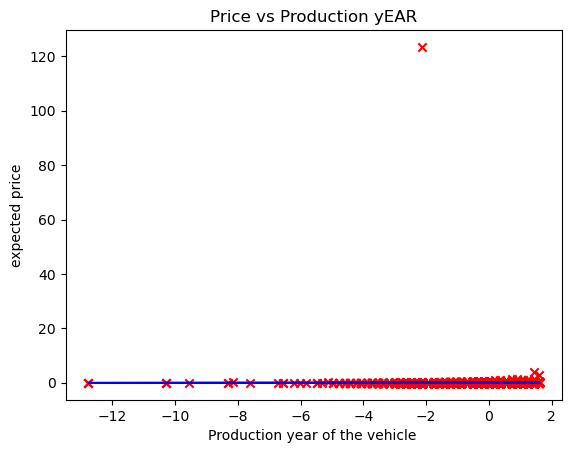

In [26]:
plt.plot(x_init, predicted, c="b")
plt.scatter(x_init, y_init, marker="x", c="r")
plt.title("Price vs Production year")
plt.ylabel("expected price")
plt.xlabel("Production year of the vehicle ")